# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from citipy import citipy

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

## Generate Cities List

In [142]:
# Some random coordinates
latitude_range = (-90,90)
longitude_range = (-180,180)

lat_longs = []
cities = []

lat = np.random.uniform(latitude_range[0],latitude_range[1],size = 2000)
long = np.random.uniform(longitude_range[0],longitude_range[1],size = 2000)

lat_longs = zip(lat,long)
#list(lat_longs)

for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

739

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


{'cod': '400', 'message': 'Nothing to geocode'}

In [143]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
query_url=f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url).json()


city_name = []
country = []
lon = []
lat = []
humidity = []
pressure = []
temp = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(query_url + city).json()
    city_name.append(response['name'])
    country.append(response['sys']['country'])
    lon.append(response['coord']['lon'])
    lat.append(response['coord']['lat'])
    humidity.append(response['main']['humidity'])
    pressure.append(response['main']['pressure'])
    temp.append(response['main']['temp'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed']) 



KeyError: 'name'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [144]:
weather_data = pd.DataFrame({ 
    "City" : city_name,
    "Country" : country,
    "Lat" : lat,
    "Lon" : lon,
    "Humidity" : humidity,
    "Pressure" : pressure,
    "Temp" : temp,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed
})
weather_data

,City,Country,Lat,Lon,Humidity,Pressure,Temp,Cloudiness,Wind Speed
0,Paraná,AR,-31.73,-60.52,30,1011,19.65,0,3.59
1,Raja,SS,8.46,25.68,94,1012,22.29,100,1.37
2,Punta Arenas,CL,-53.15,-70.92,56,1011,5.00,20,12.30
3,Hermanus,ZA,-34.42,19.23,91,1021,8.33,24,3.09
4,Ushuaia,AR,-54.80,-68.30,80,1005,2.00,40,9.30
5,Shelburne,CA,44.08,-80.20,49,1022,19.25,20,6.70
6,Russell,US,32.35,-85.20,74,1017,26.52,90,4.10
7,Bluff,NZ,-46.60,168.33,79,1005,6.67,100,5.81
8,Rikitea,PF,-23.12,-134.97,72,1023,23.07,1,1.61
9,Hong Kong,HK,22.29,114.16,93,1007,27.60,3,2.68


In [145]:
weather_data.to_csv("weather.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature Plot')

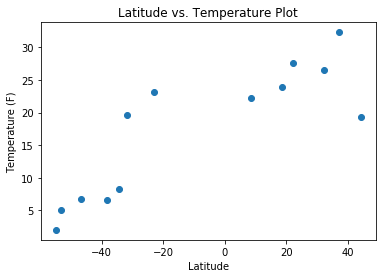

In [159]:
plt.scatter(weather_data["Lat"], weather_data["Temp"])

plt.ylabel("Temperature (F)")

plt.xlabel("Latitude")

plt.title("Latitude vs. Temperature Plot")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot')

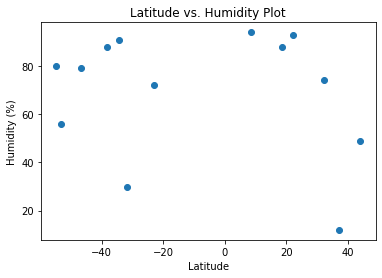

In [160]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.title("Latitude vs. Humidity Plot")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness Plot')

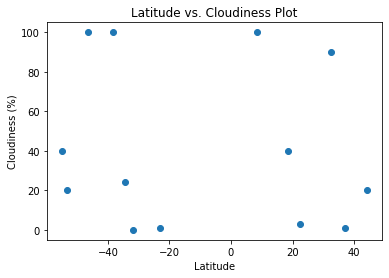

In [161]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.title("Latitude vs. Cloudiness Plot")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed Plot')

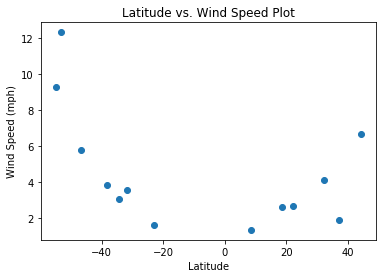

In [162]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.title("Latitude vs. Wind Speed Plot")

## Linear Regression

In [150]:
hemisphereN = weather_data.loc[weather_data["Lat"] > 0]
hemisphereS = weather_data.loc[weather_data["Lat"] < 0]

from scipy.stats import linregress

def plotLinearRegression(data_x,data_y,x_label,y_label,label_pos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data_x, data_y)
    regress_values = data_x * slope + intercept
    regression_equation = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
    print(regression_equation)

    plt.scatter(data_x,data_y)
    plt.plot(data_x,regress_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.03592x + 24.33199


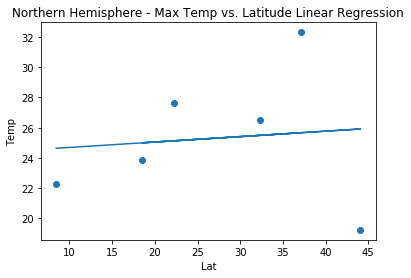

In [163]:
x_label = "Lat"
y_label = "Temp"
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plotLinearRegression(hemisphereN[x_label],hemisphereN[y_label],x_label,y_label,label_pos,1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.59778x + 34.26677


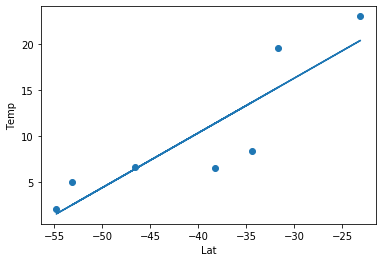

In [152]:
x_label = "Lat"
y_label = "Temp"
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plotLinearRegression(hemisphereS[x_label],hemisphereS[y_label],x_label,y_label,label_pos,1)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -1.89263x + 119.68972


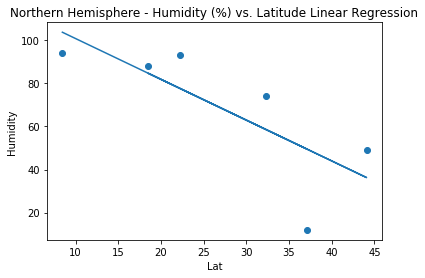

In [164]:
x_label = "Lat"
y_label = "Humidity"
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plotLinearRegression(hemisphereN[x_label],hemisphereN[y_label],x_label,y_label,label_pos,1)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.207x + 62.51529


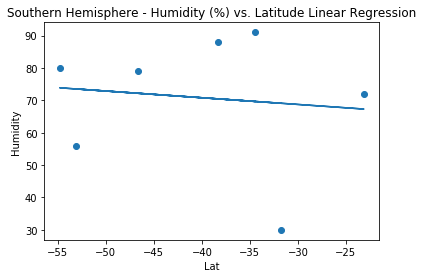

In [165]:
x_label = "Lat"
y_label = "Humidity"
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plotLinearRegression(hemisphereS[x_label],hemisphereS[y_label],x_label,y_label,label_pos,1)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -1.63741x + 86.76449


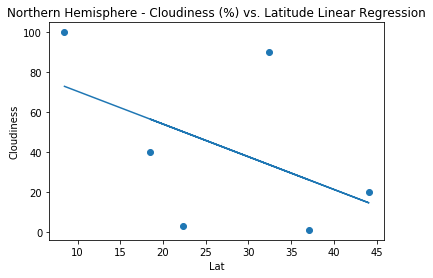

In [167]:
x_label = "Lat"
y_label = "Cloudiness"
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plotLinearRegression(hemisphereN[x_label],hemisphereN[y_label],x_label,y_label,label_pos,1)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -1.34505x + -13.48923


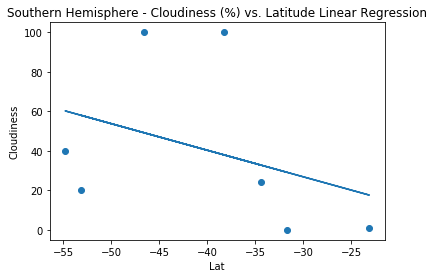

In [166]:
x_label = "Lat"
y_label = "Cloudiness"
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plotLinearRegression(hemisphereS[x_label],hemisphereS[y_label],x_label,y_label,label_pos,1)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.10781x + 0.29629


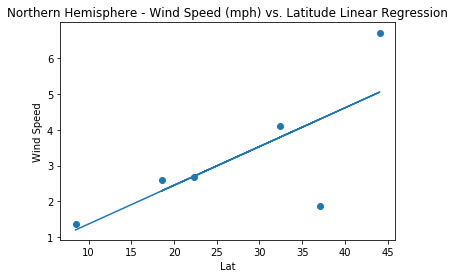

In [168]:
x_label = "Lat"
y_label = "Wind Speed"
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plotLinearRegression(hemisphereN[x_label],hemisphereN[y_label],x_label,y_label,label_pos,1)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.29819x + -6.37074


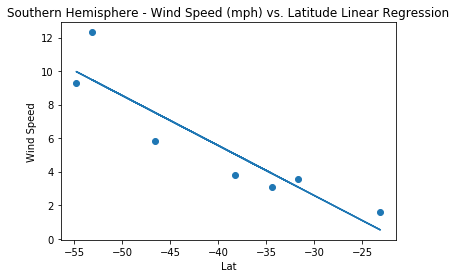

In [186]:
x_label = "Lat"
y_label = "Wind Speed"
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plotLinearRegression(hemisphereS[x_label],hemisphereS[y_label],x_label,y_label,label_pos,1)

In [ ]:
#Analysis

#NOTE: Due to dataset limitations, this analysis may be inaccurate due to small sample size.

#For temperature, there is a slight positive relationship between high latitude and 
#higher temperatures in the Northern Hemisphere. However, the significantly positive relationship
#between higher temperatures in the Southern Hemisphere and latitudes closer to zero lead me to believe
#that is simply due to a sampling error, as it makes far more sense for temperatures to increase as the distance
#from the equator decreases.

#Looking at the relationship between humidity and latitude for the northern hemisphere leads me to initially believe
#that a higher distance from the equator will decrease the humidity, as there is a sharp slope downwards in the 
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression graph. But the 
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression graph makes me reconsider, as it does not show a
#strong relationship between humidity and latitude in either direction. With inconclusive data, I can only conclude
#that there is either no relationship or simply not a strong relationship between humidity and latitude.

#Judging by the two cloudiness graphs, there does not appear to be a clear relationship between cloudiness
#and latitude. Both have similar sizes in their slopes, but lead to opposite conclusions as the northern graph
#suggests that higher distance from the equator will decrease cloudiness, while the southern graph suggests that
#cloudiness will actually decrease as latitude increases and thus becomes closer to the equator. Therefore, the result
#for the cloudiness and latitude test is that there is no clearly defined relationship between the two.

#Lastly, the graphs showing latitude and wind speed display a clearly defined relationship. Wind speed is shown to
#consistently increase as distance from the equator increases, as the cities with latitude numbers closer to the
#equator are shown to have lower wind speeds compared to cities that are further away from the equator. As the
#regressions are shown to mirror a pattern in both graphs for this set rather than contradict each other, this is
#the analysis that I am most confident in.